In [1]:
import tradingeconomics as te
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

In [3]:
data = te.fetchMarkets(symbol=['AMZN:US', 'BABA:US'], initDate='2019-01-01', output_type='df')

In [4]:
amazon = data.loc[data['symbol'] == 'AMZN:US']
alibaba = data.loc[data['symbol'] == 'BABA:US']


ama = amazon[['close']].rename(columns={'close': 'amazon'})
ama.index.name = 'Date'
ali = alibaba[['close']].rename(columns={'close': 'alibaba'})
ali.index.name = 'Date'


df = pd.merge(ama,ali, on='Date')

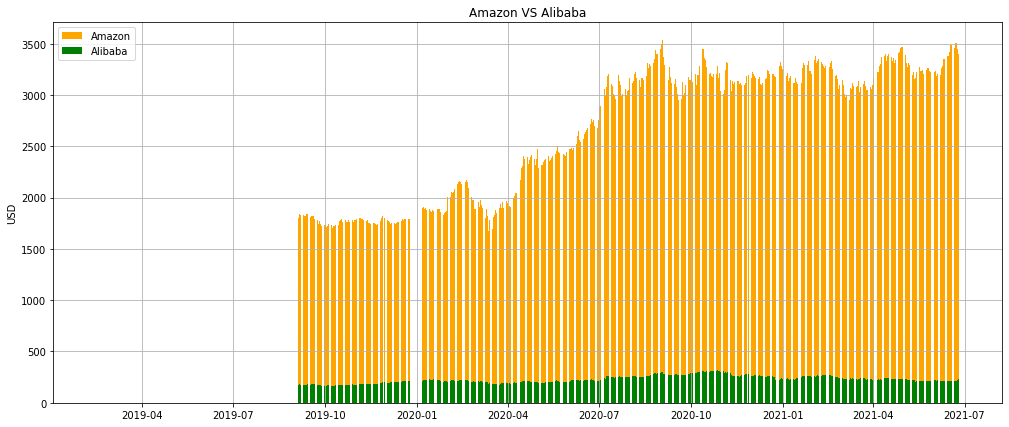

In [5]:

labels = df.index.tolist()
width = 2.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(17, 7))

ax.bar(df.index.tolist(), df['amazon'].values.tolist(),color = 'orange', label='Amazon')
ax.bar(df.index.tolist(), df['alibaba'].values.tolist(), color = 'green', label='Alibaba')

ax.set_ylabel('USD')
ax.set_title('Amazon VS Alibaba')
plt.grid(True)
ax.legend()

plt.show()